# Forward Error Correction Channel Simulation

Load in the encoded data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%store -r rx_buffer

In [2]:
hard_data = rx_buffer

hard_binary = ''
for hd in hard_data:
    h_bin = '{0:08b}'.format(hd)
    hard_binary += h_bin[::-1] # Decoder accepts LSB first
    
print(hard_binary)

1000111100000111110100000111100001000101011101010100100110001110100110011011010011110010011101110000011000010010001111100001000101110001111101110010111110001010011011110110001101111110111100000111100010101011110111011110111001111011010000100011110010101000101011100001001110011100100000110100011001101001011100101000111001010011111100101100111110011010110111011011101110110111110101001101100110100001101000100111101001011001001000100101111001011100000110111111100011101101011011100010110010111000011000010110011001011111000100110011111100100100111101101000011010000101001111100011000101111100010101000010001101101111001011111101110111001111101100100000001100001101011011011001101110010010011000101000110010001011100011111110110001011000100000110001000010111101111101010110101110001101100001101000100011110011001000110011100111011111000011101001100111000010010111011001000110001101110011010101001000100000101111000001001000100011001110111001001010000001111001110011100101010000110010001001011001101100

Perform 16-QAM modulation

<function matplotlib.pyplot.show(*args, **kw)>

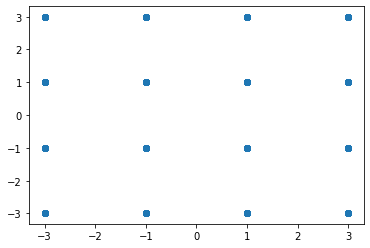

In [3]:
L = 4 # Symbol length - 16-QAM
    
mod_I = np.empty(0)
mod_Q = np.empty(0)
for i in range(0, len(hard_binary), L):
    symbol = hard_binary[i : i+L]
    
    b0b1 = symbol[0:2]
    b2b3 = symbol[2:4]

    if b0b1 == '00':
        I = -3
    elif b0b1 == '01':
        I = -1
    elif b0b1 == '11':
        I = 1
    elif b0b1 == '10':
        I = 3

    if b2b3 == '00':
        Q = -3
    elif b2b3 == '01':
        Q = -1
    elif b2b3 == '11':
        Q = 1
    elif b2b3 == '10':
        Q = 3
        
    mod_I = np.append(mod_I, I)
    mod_Q = np.append(mod_Q, Q)

plt.scatter(mod_I, mod_Q)
plt.show

Simulate an AWGN channel.

Desired SNR: 20 dB
Var Signal:  9.94362244897959
Var Noise:  0.0994362244897959
SNR (ratio):  100.0
Measured SNR:  19.707484533708183


<function matplotlib.pyplot.show(*args, **kw)>

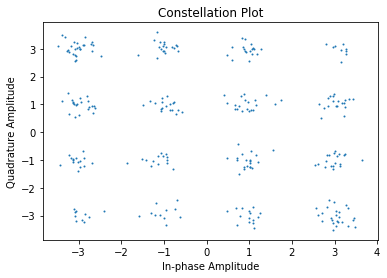

In [4]:
signal = mod_I + 1j*mod_Q

# Calculate nosie power
SNR = 20 # SNR dB
snr = 10**(SNR/10) # SNR ratio
var_signal = np.var(signal) # power
var_noise = var_signal / snr
print('Desired SNR: %d dB' % SNR)
print('Var Signal: ', var_signal)
print('Var Noise: ' ,var_noise)
print('SNR (ratio): ', var_signal/var_noise)

# Generate noise
noise_len = len(signal)
noise_mean = 0
noise = (np.random.normal(noise_mean,np.sqrt(2)/2,noise_len) 
         + 1j*np.random.normal(noise_mean,np.sqrt(2)/2,noise_len))
noise_scaled = noise * np.sqrt(var_noise)

# Add noise to signal
signal_with_noise = signal + noise_scaled

# Measure SNR to verify
power_signal = 10*np.log10(np.var(signal))
power_noise = 10*np.log10(np.mean(np.abs(signal - signal_with_noise)**2))
print('Measured SNR: ', power_signal - power_noise)

# Plot signal with noise
x = [n.real for n in signal_with_noise]
y = [n.imag for n in signal_with_noise]   

plt.scatter(x, y,s=1)
plt.ylabel('Quadrature Amplitude')
plt.xlabel('In-phase Amplitude')
plt.title('Constellation Plot')
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 300
plt.show

The soft value log-likelihood ratio is defined as:

LLR(x) = ln(P(x=1) / P(x=0))

This means that positive values (including 0) are interpreted as a hard binary 1 and negative values are interpreted as a hard binary 0. The magnitude of these values indicates the certainty, with a larger magnitude equating to a higher certainty and vice versa.

Perform soft demodulation using http://www.dsplog.com/2009/07/05/softbit-16qam/ as reference

In [5]:
llrs = []
for y in signal_with_noise:
    # Bit 0
    if y.real < -2:
        b0 = 2*(y.real+1)
    elif y.real >= -2 and y.real < 2:
        b0 = y.real
    elif y.real > 2:
        b0 = 2*(y.real-1)
        
    # Bit 1
    b1 = -abs(y.real)+2
    
    # Bit 2
    if y.imag < -2:
        b2 = 2*(y.imag+1)
    elif y.imag >= -2 and y.imag < 2:
        b2 = y.imag
    elif y.imag > 2:
        b2 = 2*(y.imag-1) 
        
    # Bit 3
    b3 = -abs(y.imag)+2
    
    llrs.append(b0)
    llrs.append(b1)
    llrs.append(b2)
    llrs.append(b3)

Store the LLR values

In [6]:
%store llrs

Stored 'llrs' (list)
